# EDA dan Preprocessing


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

In [54]:
# Load data menggunakan pandas
data = pd.read_csv("Dataset.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
# menghapus kolom target
data.drop(['class'], axis=1, inplace=True)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
# cek missing value
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


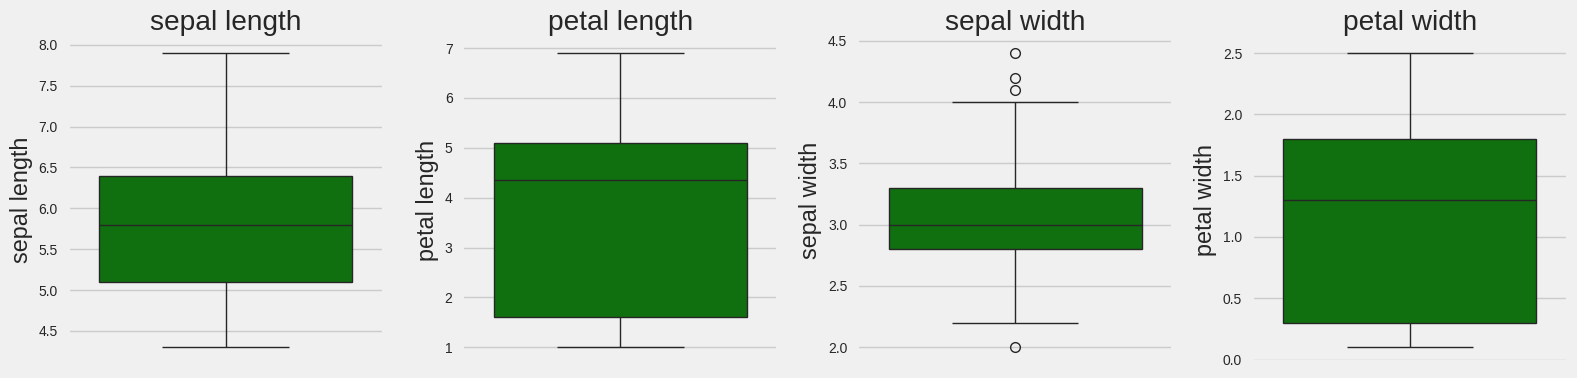

In [58]:
def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = ['sepal length', 'petal length', 'sepal width', 'petal width']

    # Buat figur dan axes untuk subplot dengan jumlah subplot sesuai jumlah variabel
    fig, axes = plt.subplots(1, len(variables), figsize=(16, 4))  # Sesuaikan jumlah subplot
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color='green', ax=axes[i])  # Perhatikan perubahan di sini
        axes[i].set_title(var)  # Judul untuk setiap plot

    plt.tight_layout()  # Pastikan layout rapi
    plt.show()

# Panggil fungsi
box_plot(data)


In [59]:
# Menghapus outliers pada kolom 'sepal width' menggunakan metode IQR
def remove_outliers_iqr(data, column):
    # Hitung Q1, Q3, dan IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

data_cleaned = remove_outliers_iqr(data, 'sepal width')

print(f"Jumlah data sebelum penghapusan outliers: {len(data)}")
print(f"Jumlah data setelah penghapusan outliers: {len(data_cleaned)}")

# Memperbarui dataset
data = data_cleaned.reset_index(drop=True)


Jumlah data sebelum penghapusan outliers: 150
Jumlah data setelah penghapusan outliers: 146


dikarenakan ada outliers di kolom sepal width maka akan di hapus menggunakan Metode
IQR

In [60]:
scaler = MinMaxScaler()

x_scaler = scaler.fit_transform(data)
x_scaler

array([[0.22222222, 0.72222222, 0.06779661, 0.04166667],
       [0.16666667, 0.44444444, 0.06779661, 0.04166667],
       [0.11111111, 0.55555556, 0.05084746, 0.04166667],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.19444444, 0.77777778, 0.06779661, 0.04166667],
       [0.30555556, 0.94444444, 0.11864407, 0.125     ],
       [0.08333333, 0.66666667, 0.06779661, 0.08333333],
       [0.19444444, 0.66666667, 0.08474576, 0.04166667],
       [0.02777778, 0.38888889, 0.06779661, 0.04166667],
       [0.16666667, 0.5       , 0.08474576, 0.        ],
       [0.30555556, 0.83333333, 0.08474576, 0.04166667],
       [0.13888889, 0.66666667, 0.10169492, 0.04166667],
       [0.13888889, 0.44444444, 0.06779661, 0.        ],
       [0.        , 0.44444444, 0.01694915, 0.        ],
       [0.41666667, 1.        , 0.03389831, 0.04166667],
       [0.30555556, 0.94444444, 0.05084746, 0.125     ],
       [0.22222222, 0.72222222, 0.06779661, 0.08333333],
       [0.38888889, 0.88888889,

standarisasi menggunakan MinMaxScaler, sehingga setiap fitur diubah untuk berada dalam rentang 0 hingga 1. Proses ini memastikan bahwa semua fitur memiliki skala yang seragam, menghilangkan pengaruh perbedaan skala antar fitur terhadap algoritma pemodelan

# Pemodelan Menggunakan Algoritma K-Means

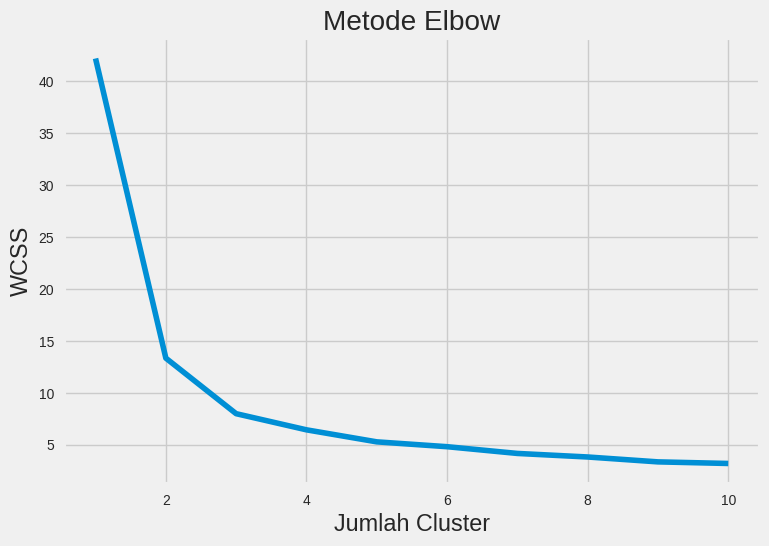

In [61]:
# menentukan jumlah klaster yang akan digunakan
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaler)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Berdasarkan grafik Metode Elbow, jumlah klaster optimal yang dapat digunakan adalah **3**, karena pada titik ini (k = 3) terdapat "elbow point," yaitu titik di mana penurunan nilai WCSS mulai melambat secara signifikan. Ini menunjukkan bahwa menambahkan lebih dari 3 klaster tidak memberikan peningkatan yang berarti dalam kualitas klasterisasi, sehingga k = 3 merupakan pilihan yang efisien untuk mengelompokkan data Anda.

Hasil Klasterisasi:
   sepal length  sepal width  petal length  petal width  Label_K-Means
0           5.1          3.5           1.4          0.2              2
1           4.9          3.0           1.4          0.2              2
2           4.7          3.2           1.3          0.2              2
3           4.6          3.1           1.5          0.2              2
4           5.0          3.6           1.4          0.2              2


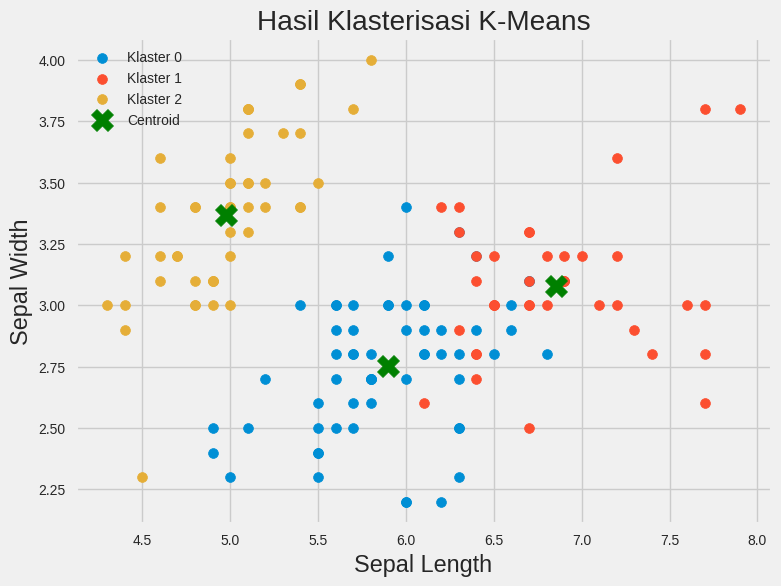

In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Label_K-Means'] = kmeans.fit_predict(data)

# Menampilkan hasil
print("Hasil Klasterisasi:")
print(data.head())

# Tambahkan label ke dalam scatter plot untuk setiap klaster
plt.figure(figsize=(8, 6))
for cluster_id in range(3):  # Jumlah klaster = 3
    plt.scatter(
        data[data['Label_K-Means'] == cluster_id]['sepal length'],  # Data untuk klaster tertentu
        data[data['Label_K-Means'] == cluster_id]['sepal width'],
        label=f'Klaster {cluster_id}',
        s=50
    )

# Tambahkan centroid
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, c='green', marker='X', label='Centroid'
)

# Tambahkan elemen visualisasi
plt.title('Hasil Klasterisasi K-Means')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()  # Tampilkan legend
plt.show()


Grafik hasil klasterisasi K-Means menunjukkan bahwa data terbagi menjadi tiga klaster (Klaster 0, Klaster 1, dan Klaster 2) berdasarkan fitur **sepal length** (sumbu X) dan **sepal width** (sumbu Y). Setiap klaster direpresentasikan dengan warna yang berbeda: biru untuk Klaster 0, merah untuk Klaster 1, dan kuning untuk Klaster 2. Posisi centroid setiap klaster ditampilkan sebagai tanda **X besar berwarna hijau**, yang merupakan pusat dari masing-masing klaster berdasarkan perhitungan algoritma K-Means. Klasterisasi ini memperlihatkan bahwa data membentuk kelompok-kelompok yang relatif terpisah dengan baik, dengan centroid yang mencerminkan karakteristik rata-rata dari masing-masing kelompok. Hasil ini dapat digunakan untuk menganalisis pola atau kategori dalam data berdasarkan kesamaan antar fitur.

# Pemodelan Menggunakan Algoritma DB-Scan


Hasil Klasterisasi DBSCAN:
   sepal length  sepal width  petal length  petal width  Label_K-Means  \
0           5.1          3.5           1.4          0.2              2   
1           4.9          3.0           1.4          0.2              2   
2           4.7          3.2           1.3          0.2              2   
3           4.6          3.1           1.5          0.2              2   
4           5.0          3.6           1.4          0.2              2   

   Label_DBSCAN  
0             0  
1             0  
2             0  
3             0  
4             0  


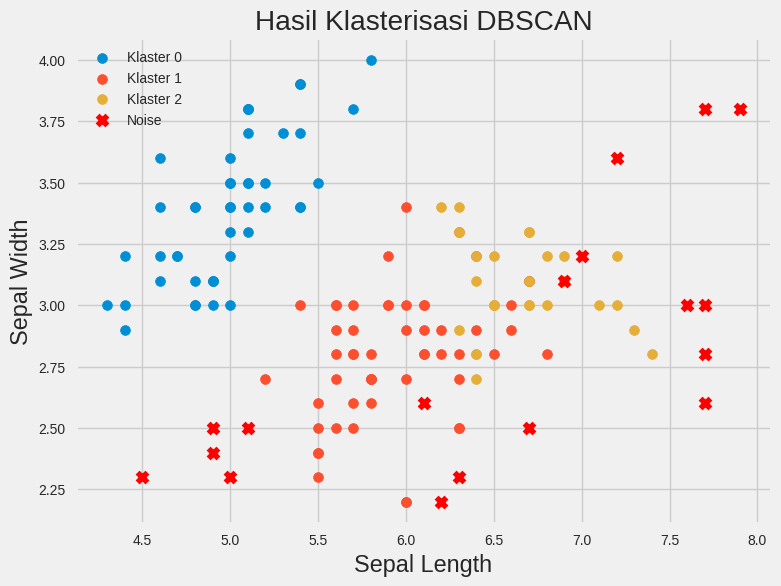

In [63]:
eps = 0.5  # Radius maksimum untuk tetangga
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data)

# Tambahkan label hasil DBSCAN ke dalam dataset
data['Label_DBSCAN'] = dbscan_labels

# Menampilkan hasil
print("Hasil Klasterisasi DBSCAN:")
print(data.head())

# Visualisasi hasil DBSCAN dengan legend
plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)

# Loop untuk plotting setiap klaster
for label in unique_labels:
    if label == -1:  # Noise
        plt.scatter(
            data[data['Label_DBSCAN'] == label]['sepal length'],
            data[data['Label_DBSCAN'] == label]['sepal width'],
            label='Noise',
            s=50, c='red', marker='x'
        )
    else:
        plt.scatter(
            data[data['Label_DBSCAN'] == label]['sepal length'],
            data[data['Label_DBSCAN'] == label]['sepal width'],
            label=f'Klaster {label}',
            s=50
        )

plt.title('Hasil Klasterisasi DBSCAN')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Hasil klasterisasi menggunakan algoritma DBSCAN menunjukkan bahwa data terbagi menjadi tiga klaster utama, yang masing-masing direpresentasikan dengan warna biru (Klaster 0), oranye (Klaster 1), dan kuning (Klaster 2), sementara beberapa titik data diberi label sebagai noise (ditandai dengan simbol merah "x"), yang menunjukkan bahwa data tersebut tidak cukup dekat dengan klaster mana pun untuk memenuhi kriteria kepadatan klasterisasi. Klaster biru (Klaster 0) sebagian besar berada pada rentang sepal length yang lebih pendek dengan sepal width yang lebih lebar, sementara klaster oranye (Klaster 1) cenderung berada pada rentang sepal length sedang dengan sepal width yang lebih sempit. Klaster kuning (Klaster 2) terlihat berada pada rentang sepal length yang lebih panjang dan sepal width yang bervariasi. Titik-titik yang dianggap noise umumnya terletak di area yang lebih jarang dihuni oleh data atau jauh dari klaster utama, yang mencerminkan kepadatan data rendah pada radius tertentu (eps). Noise ini dapat menjadi indikasi data yang tidak sesuai dengan pola utama atau outlier

# Matriks Evaluasi

In [47]:
# ALgoritma K-means
#silhoutte score
silhouette_kmeans = silhouette_score(data[['sepal length', 'sepal width', 'petal length', 'petal width']], data['Label_K-Means'])
print(f"Silhouette Score K-Means: {silhouette_kmeans:.2f}")

# Evaluasi Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(data[['sepal length', 'sepal width', 'petal length', 'petal width']], data['Label_K-Means'])
print(f"Davies-Bouldin Index K-Means: {davies_bouldin_kmeans:.2f}")

Silhouette Score K-Means: 0.51
Davies-Bouldin Index K-Means: 0.72


In [50]:
if len(set(data['Label_DBSCAN'])) > 1:  # Pastikan ada lebih dari satu klaster
    silhouette_dbscan = silhouette_score(data[['sepal length', 'sepal width', 'petal length', 'petal width']], data['Label_DBSCAN'])
    davies_bouldin_dbscan = davies_bouldin_score(data[['sepal length', 'sepal width', 'petal length', 'petal width']], data['Label_DBSCAN'])

    print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.2f}")
    print(f"Davies-Bouldin Index DBSCAN: {davies_bouldin_dbscan:.2f}")
else:
    print("DBSCAN menghasilkan hanya noise atau satu klaster. Evaluasi tidak dapat dilakukan.")

Silhouette Score DBSCAN: 0.41
Davies-Bouldin Index DBSCAN: 3.19


**Analisis:**

1. Silhouette Score:

K-Means memiliki Silhouette Score lebih tinggi (0.51) dibandingkan DBSCAN (0.41).
Ini menunjukkan bahwa data pada K-Means lebih baik dikelompokkan dalam klaster yang jelas, dengan jarak intra-klaster lebih kecil dan jarak antar-klaster lebih besar.

2. Davies-Bouldin Index:

K-Means memiliki Davies-Bouldin Index lebih rendah (0.72) dibandingkan DBSCAN (3.19).
Nilai DBI yang lebih rendah pada K-Means menunjukkan bahwa klaster lebih kompak dan terpisah dengan baik dibandingkan dengan DBSCAN.

Jadi model K-Means memberikan performa klasterisasi yang lebih baik dibandingkan DBSCAN. K-Means menghasilkan klaster yang lebih jelas, kompak, dan terpisah dibandingkan DBSCAN, yang tampaknya kurang efektif dalam mengelompokkan data dengan parameter yang digunakan (eps=0.5, min_samples=5)